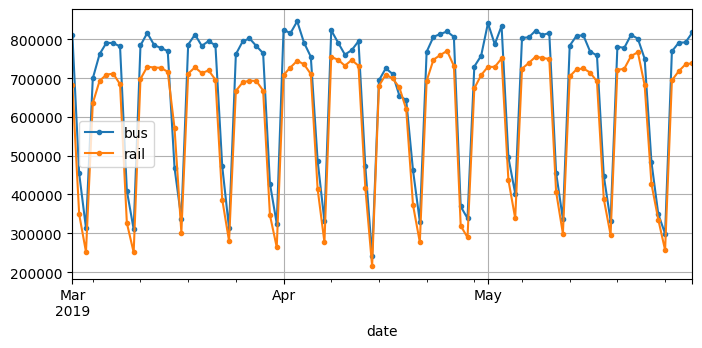

March:  ['W', 'A', 'U', 'W', 'W', 'W', 'W', 'W', 'A', 'U', 'W', 'W', 'W', 'W', 'W', 'A', 'U', 'W', 'W', 'W', 'W', 'W', 'A', 'U', 'W', 'W', 'W', 'W', 'W', 'A', 'U']
day_type         A
bus         468181
rail        570703
Name: 2019-03-16 00:00:00, dtype: object
April:  ['W', 'W', 'W', 'W', 'W', 'A', 'U', 'W', 'W', 'W', 'W', 'W', 'A', 'U', 'W', 'W', 'W', 'W', 'W', 'A', 'U', 'W', 'W', 'W', 'W', 'W', 'A', 'U', 'W', 'W', 'W', 'W', 'W', 'A', 'U', 'W', 'W', 'W', 'W', 'W', 'A', 'U', 'W', 'W', 'W', 'W', 'W', 'A', 'U', 'W', 'W', 'W', 'W', 'W', 'A', 'U', 'U', 'W', 'W', 'W']
May  :  ['W', 'W', 'W', 'W', 'W', 'A', 'U', 'W', 'W', 'W', 'W', 'W', 'A', 'U', 'W', 'W', 'W', 'W', 'W', 'A', 'U', 'W', 'W', 'W', 'W', 'W', 'A', 'U', 'W', 'W', 'W', 'W', 'W', 'A', 'U', 'W', 'W', 'W', 'W', 'W', 'A', 'U', 'W', 'W', 'W', 'W', 'W', 'A', 'U', 'W', 'W', 'W', 'W', 'W', 'A', 'U', 'U', 'W', 'W', 'W']


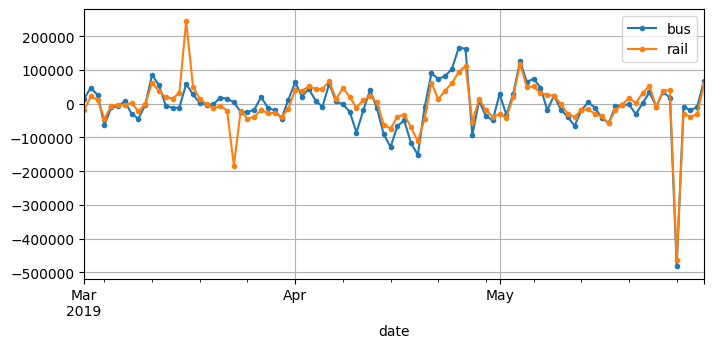

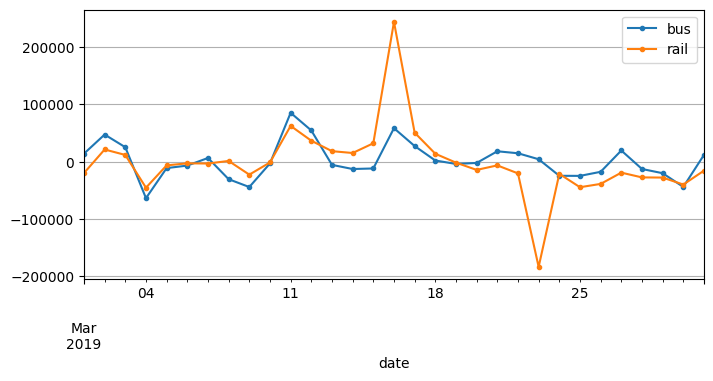

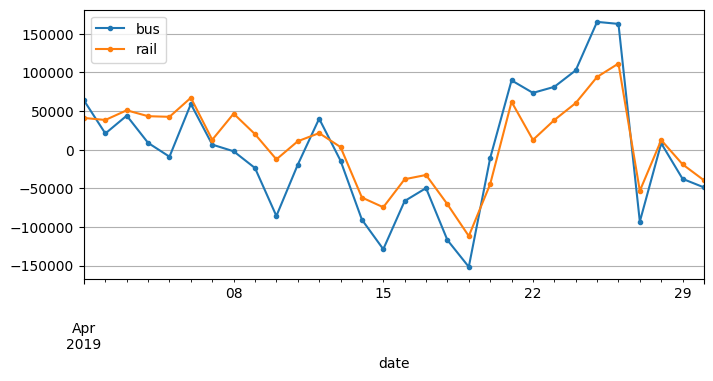

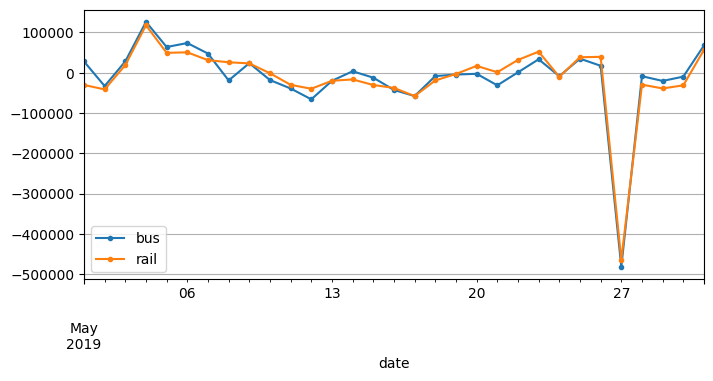

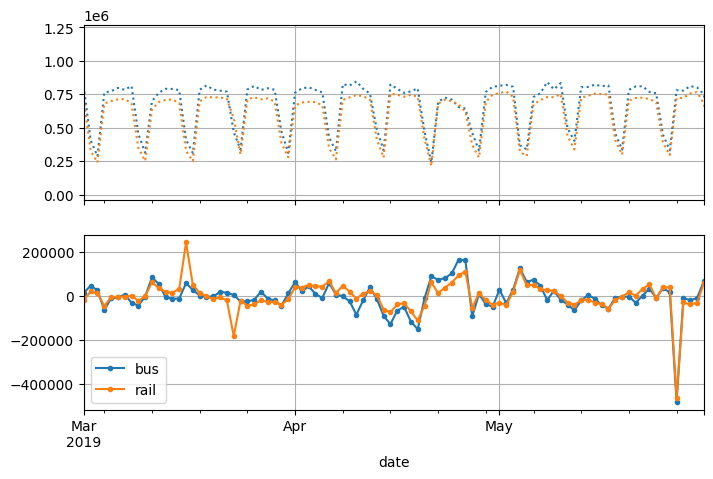

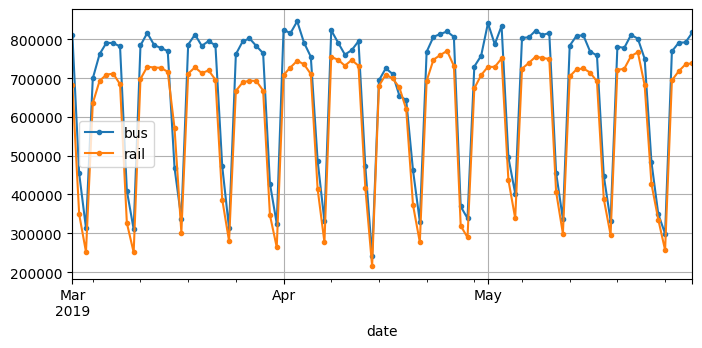

In [ ]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

path = Path("CTA_-_Ridership_-_Daily_Boarding_Totals.csv")
df = pd.read_csv(path, parse_dates=["service_date"])
df.columns = ["date", "day_type", "bus", "rail", "total"] # shorter names
# "bus" column representing the no.of people who boarded a bus on that date
# "rail" column representing the no.of people who boarded a train on that date

df['date'] = pd.to_datetime(df['date']) # Ensure it's in datetime format
df = df.sort_values("date").set_index("date") # setting date as the index to access rows

df = df.drop("total", axis=1) # no need total, its just bus + rail
df = df.drop_duplicates() # remove dupicated months (2011-10 and 2014-07)
#print(df["date"].dtype)
timeseries = df["2019-03":"2019-05"]
timeseries.plot(grid=True, marker=".", figsize=(8, 3.5))
#df.loc["2019-03":"2019-05"].plot(grid=True, marker=".", figsize=(8, 3.5))
plt.show()

'''
since we can see a similar pattern repeated every week, naive forecasting can be used
to forcast the no.of people boarding buses and trains in the next week (next time step),
by copying the values from the previous week (previous time step). RNN is not needed here as the
weekly seasonality is repetitive and strong. For more precise forcasting, a good technique would
be to use RNN to forecast, with the naive forecast as the baseline.
'''
# Naive forecast for the next week

''' Step 1: Perform differencing to evaluate whether a naive forecast is a good fit '''
df2 = df[["bus", "rail"]] #df2 containing only the bus and ride columns from df.

# perform differencing to check if a week's values are almost the same as last week's values (same weekday).
differenced_df = df2.diff(7) #subtracts each value from the value that appeared 7 rows earlier
# basically, df.loc[i, ["bus", "ride"]] - df.loc[i - 7, ["bus", "ride"]] "The value at time t minus the value at t-7"
# So:
# Row 7 → compared with Row 0
# Row 8 → compared with Row 1
# Row 9 → compared with Row 2
# etc.
# Rows 0 to 6 will show NaN because there aren’t enough earlier rows to compare to.

differenced_timeseries = differenced_df["2019-03":"2019-05"]
differenced_timeseries.plot(grid=True, marker=".", figsize=(8, 3.5))

# If the .diff(7) values are close to 0, that means: This week's value is almost the same as last week's value (same weekday).
# If the .diff(7) values vary from each other, that means: This week's value not the same as last week's value, maybe due to a holiday

''' Step 2: Naive forcasting (copying) the previous week's values as next week's values.
(Because it is decided that naive forcast will be a good fit, based on the outcome of Step 1)'''
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 5))
timeseries.plot(grid=True, marker=".", figsize=(8, 3.5)) # original timeseries
timeseries.shift(7).plot(ax=axs[0], grid=True, legend=False, linestyle=":") #lagged
differenced_timeseries.plot(ax=axs[1], grid=True, marker=".") # 7-day difference time series
plt.show()
